In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

%matplotlib inline

In [2]:
data = pd.read_csv('../random-search-2/meta.csv')
print(f'Loaded {len(data)} trials.')

Loaded 50 trials.


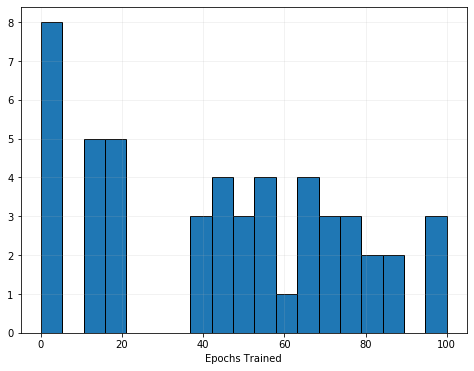

In [3]:
plt.figure(figsize=(8,6))
plt.hist(data['epochs'], bins=np.linspace(0,100,20), edgecolor='k');
plt.grid(alpha=0.2)
plt.xlabel('Epochs Trained')
plt.savefig('images/epochs_trained_hist.png', bbox_inches='tight')

In [4]:
data = data[data['epochs'] > 19]
print(f'Keeping {len(data)} trials.')

Keeping 34 trials.


In [13]:
losses = {}

for trial_id in list(data['id']):
    losses[trial_id] = pd.read_csv('../random-search-2/metrics/metrics.{}.csv'.format(trial_id))

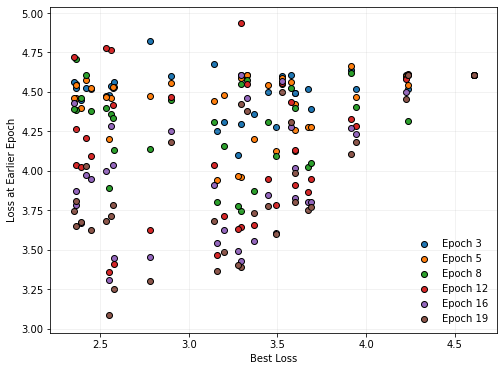

In [29]:
plt.figure(figsize=(8,6))

for x in [3, 5, 8, 12, 16, 19]:
    loss_at_x = []
    loss_at_best = []

    for trial, loss in losses.items():
        loss_at_x.append(loss['valid_loss'][x])
        loss_at_best.append(min(loss['valid_loss']))

    plt.scatter(loss_at_best, loss_at_x, edgecolor='k',
                    marker='o', label='Epoch {}'.format(x))
    
plt.grid(alpha=0.2)
plt.xlabel('Best Loss')
plt.ylabel('Loss at Earlier Epoch')
plt.legend(frameon=False)
plt.savefig('images/loss_x_loss_best.png', bbox_inches='tight')

In [30]:
import seaborn as sns

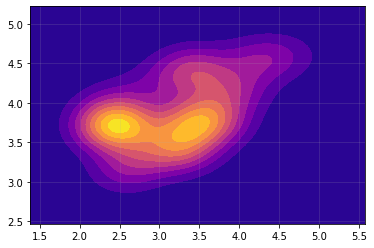

In [38]:
sns.kdeplot(loss_at_best, loss_at_x, shade=True, cmap='plasma')
plt.grid(alpha=0.2)
plt.xlabel()

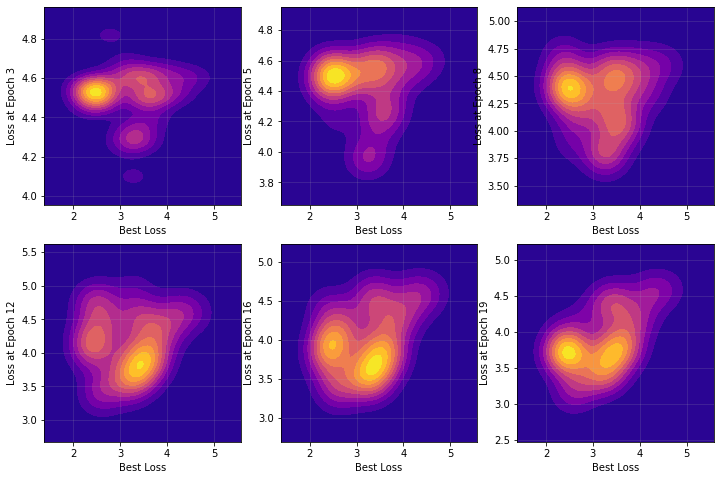

In [46]:
plt.figure(figsize=(12,8))

for i,x in enumerate([3, 5, 8, 12, 16, 19]):
    loss_at_x = []
    loss_at_best = []

    for trial, loss in losses.items():
        loss_at_x.append(loss['valid_loss'][x])
        loss_at_best.append(min(loss['valid_loss']))
    plt.subplot(2,3,i + 1)
    sns.kdeplot(loss_at_best, loss_at_x, shade=True, cmap='plasma')
    
    plt.grid(alpha=0.2)
    plt.xlabel('Best Loss')
    plt.ylabel('Loss at Epoch {}'.format(x))
    #plt.xlim([1.3,5.8])
    #plt.ylim([2.5,5.6])
    
plt.savefig('images/loss_x_loss_best_kde.png', bbox_inches='tight')